In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors

In [2]:
def cuboid_data(center, size=(1,1,1)):
    # code taken from
    # http://stackoverflow.com/questions/30715083/python-plotting-a-wireframe-3d-cuboid?noredirect=1&lq=1
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return x, y, z

In [34]:
# 验证数据
x, y, z = cuboid_data((0,0,0))
center = (0, 0, 0)
size = (1, 1, 1)
o = [a - b / 2 for a, b in zip(center, size)]
o

[-0.5, -0.5, -0.5]

In [22]:
def plotCubeAt(pos=(0,0,0), c="b", alpha=0.1, ax=None):
    # Plotting N cube elements at position pos
    if ax != None:
        X, Y, Z = cuboid_data( (pos[0],pos[1],pos[2]) )
        X = np.array(X)
        Y = np.array(Y)
        Z = np.array(Z)
        ax.plot_surface(X, Y, Z, color=c, rstride=1, cstride=1, alpha=0.1)

In [29]:
def plotMatrix(ax, x, y, z, data, cmap="jet", cax=None, alpha=0.05):
    # plot a Matrix 
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    colors = lambda i,j,k : matplotlib.cm.ScalarMappable(norm=norm,cmap = cmap).to_rgba(data[i,j,k]) 
    for i, xi in enumerate(x):
            for j, yi in enumerate(y):
                for k, zi, in enumerate(z):
                    plotCubeAt(pos=(xi, yi, zi), c=colors(i,j,k), alpha=alpha,  ax=ax)



    if cax !=None:
        cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')  
        cbar.set_ticks(np.unique(data))
        # set the colorbar transparent as well
        cbar.solids.set(alpha=alpha)              


(50, 25, 25)


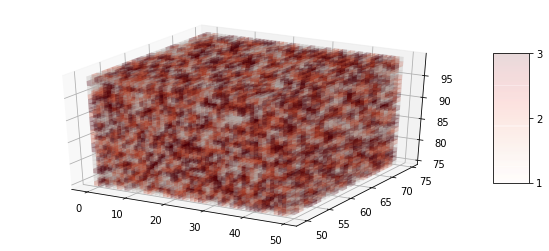

In [35]:
x = np.array(range(50))
y = np.array(range(50,75))
z = np.array(range(75,100))
data_value = np.random.randint(1,4, size=(len(x), len(y), len(z)) )
print(data_value.shape)

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
ax_cb = fig.add_axes([0.8, 0.3, 0.05, 0.45])
ax.set_aspect('equal')

plotMatrix(ax, x, y, z, data_value, cmap="Reds", cax = ax_cb)
plt.show()

In [36]:
x = np.array(range(50))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])